In [3]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

### Portfolio

In [4]:
portfolio = pd.read_csv('resources/portfolio.csv')
portfolio

,reward,channels,mms_unlock,duration,offer_type,offer_id
0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
3,5,"['web', 'email', 'mobile', 'social']",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
4,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"['web', 'email', 'mobile', 'social']",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"['web', 'email', 'mobile', 'social']",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,2,"['web', 'email', 'mobile']",10,7,discount,2906b810c7d4411798c6938adc9daaa5
8,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed
9,0,"['email', 'mobile', 'social']",0,3,informational,5a8bc65990b245e5a138643cd4eb9837


In [5]:
# Nothing much to look here, so we move on to profile.csv

### Profile

In [6]:
profile = pd.read_csv('resources/profile.csv', parse_dates=[3])
profile.head()

,gender,age,customer_id,became_member_on,income
0,F,55.0,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0
1,F,75.0,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0
2,M,68.0,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0
3,M,65.0,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0
4,M,58.0,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000.0


In [7]:
profile['gender'].value_counts()  # The data isn't too skewed towards any gender

M    8484
F    6129
O     212
Name: gender, dtype: int64

In [8]:
profile.groupby('gender')['income', 'age'].agg(['mean', 'median'])

income                 age       
                mean   median       mean median
gender                                         
F       71306.412139  71000.0  57.544950   58.0
M       61194.601603  59000.0  52.116690   53.0
O       63287.735849  62000.0  54.400943   55.0

In [9]:
# Females have higher age and income

In [10]:
def plot_salary(df, gender):
    plt.style.use('seaborn-whitegrid')
    fix, ax = plt.subplots(figsize=(10, 8))

    ax.set_title('Salary distribution for {}'.format(gender), color='#44546B', pad=50, fontsize=25)

    ax.tick_params('x', colors='#008080', labelsize=15, pad=20)
    ax.tick_params('y', colors='#008080', labelsize=15, pad=15)

    for i in ['top', 'right', 'bottom', 'left']:
        ax.spines[i].set_visible(False)
    
    ax.grid(False)
    
    def thousands(x, pos):
        return '%1.0f K' % (x*1e-3)
    formatter = FuncFormatter(thousands)
    ax.xaxis.set_major_formatter(formatter)
    
    sns.distplot(df.loc[df['gender'] == gender[0], 'income'], kde=False)

    plt.ylabel('')
    plt.xlabel('');

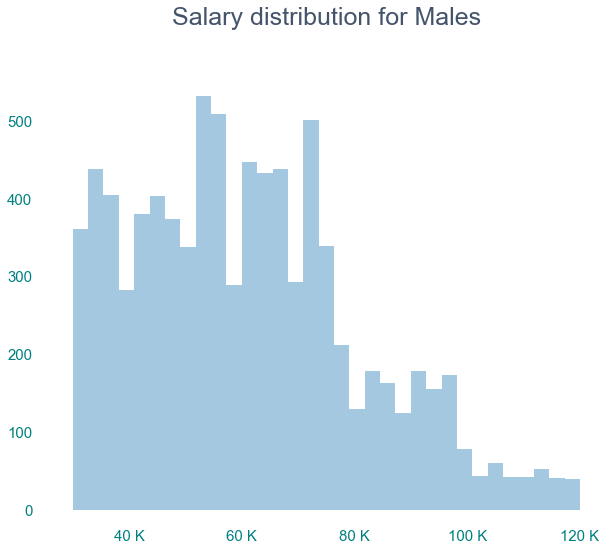

In [11]:
plot_salary(profile, 'Males')

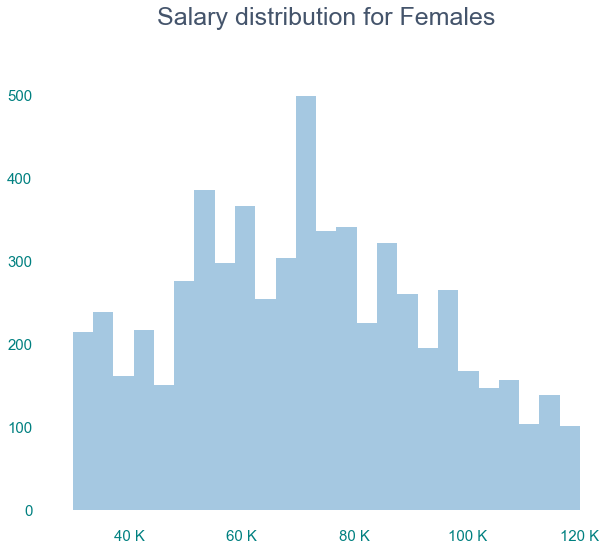

In [12]:
plot_salary(profile, 'Females')

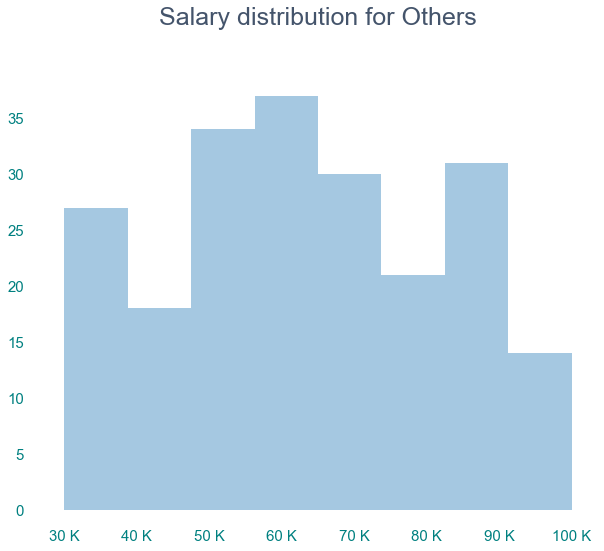

In [13]:
plot_salary(profile, 'Others')

### Transcripts

In [14]:
transcript = pd.read_csv('resources/transcript.csv')
transcript.head()

,customer_id,event,value,days_since_test_start
0,0009655768c64bdeb2e877511632db8f,offer received,{'offer id': '5a8bc65990b245e5a138643cd4eb9837'},7.0
1,0009655768c64bdeb2e877511632db8f,offer viewed,{'offer id': '5a8bc65990b245e5a138643cd4eb9837'},8.0
2,0009655768c64bdeb2e877511632db8f,transaction,{'amount': 22.16},9.5
3,0009655768c64bdeb2e877511632db8f,offer received,{'offer id': '3f207df678b143eea3cee63160fa8bed'},14.0
4,0009655768c64bdeb2e877511632db8f,offer viewed,{'offer id': '3f207df678b143eea3cee63160fa8bed'},15.5


In [15]:
events = transcript['event'].value_counts()
print('Total transactions: {:15}\nOffers received: {:17}\nPercentage offers viewed: {:20}\nPercentage offers completed: {}'.format(\
      events[0], events[1], events[2] / events[1] * 100, events[3] / events[1] * 100))

Total transactions:          123957
Offers received:             66501
Percentage offers viewed:    74.97631614562187
Percentage offers completed: 48.787236282161174


In [16]:
events

transaction        123957
offer received      66501
offer viewed        49860
offer completed     32444
Name: event, dtype: int64

In [17]:
# This concludes our EDA